In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")


In [5]:
path = r'C:\Users\Spero\Documents\Spotify Project'

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data', 'original Data', 'spotify-2023.csv'), encoding='latin-1')

In [7]:
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Inspecting Data
## Inspecting datatypes and find missing/duplicated values.

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [10]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [11]:
print(df.isna().sum())
print("\nDuplicated rows: ",df.duplicated().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Duplicated rows:  0


In [12]:
df['in_shazam_charts'].fillna('0',inplace=True)
df['in_deezer_playlists'].fillna('0',inplace=True)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int')
df['key'].fillna('-',inplace=True)
df.dropna(inplace=True)

In [13]:
print("Missing values: ",df.isna().sum().sum())
print("Duplicated rows: ",df.duplicated().sum())

Missing values:  0
Duplicated rows:  0


# Creating new features to help with analysis

In [14]:
df['collab']= list(['Multiple Artist' if x>1 else 'Solo' for x in df['artist_count']])
df['streams_million']=df['streams']/1000000

# Exploratory data analysis
### Analyze and visualize characteristics and relationships of data to answer questions

## Which features are correlated?¶
### Stream amount is strongly correlated to the number of playlists in Spotify and Apple. There's also a strong correlation where songs that's featured in many Spotify playlists are also featured in many Apple playlists. A correlation is found where tracks that ranked highly in Spotify charts are also highly ranked in Apple and Deezer charts.

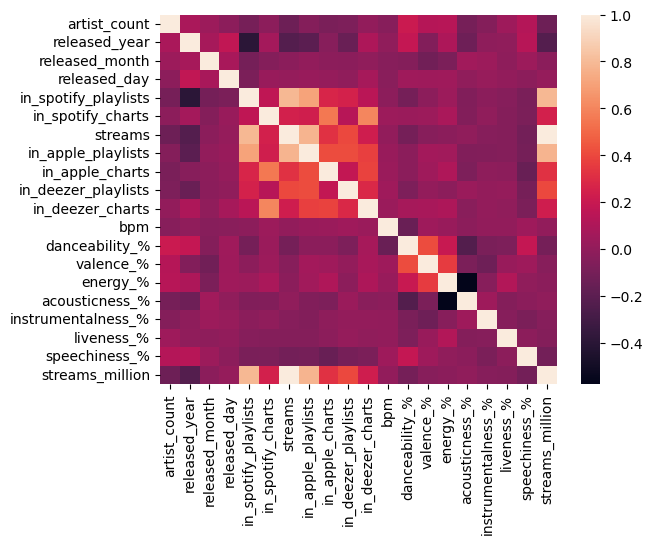

In [15]:
sns.heatmap(df.select_dtypes('number').corr())
plt.show()

<AxesSubplot:>

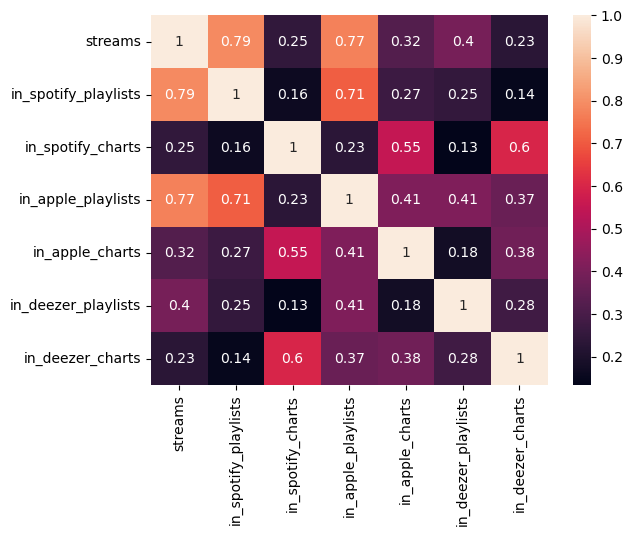

In [16]:
cols = ['streams', 'in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
sns.heatmap(df[cols].corr(),annot=True)

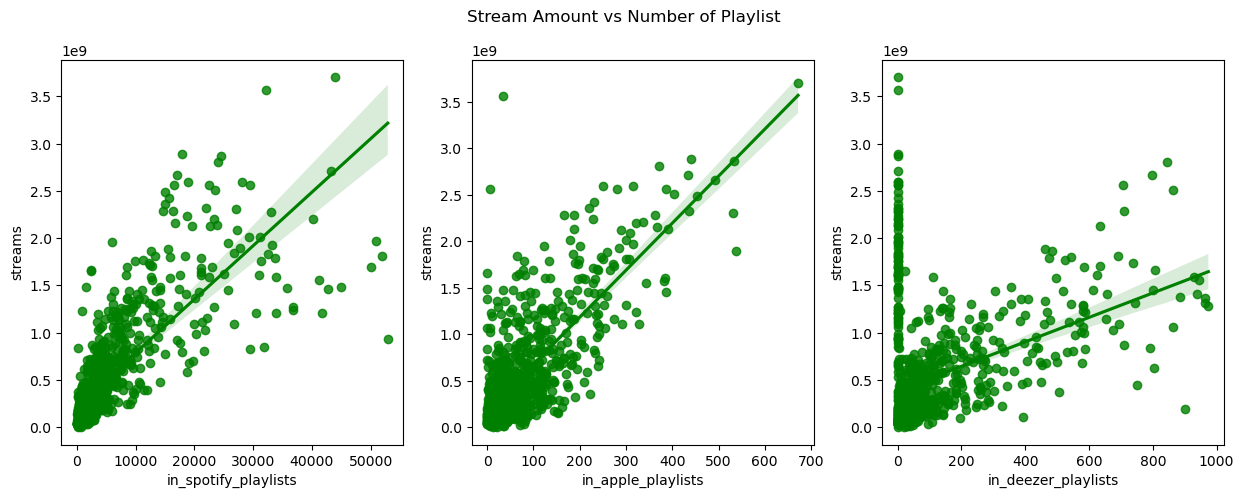

In [17]:
cols = ['in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']
fig, ax = plt.subplots(1,3,figsize=(15,5))
for count, col in enumerate(cols):
    sns.regplot(data=df,x=col, y='streams', ax=ax[count], color='green')
plt.suptitle('Stream Amount vs Number of Playlist')
plt.show()

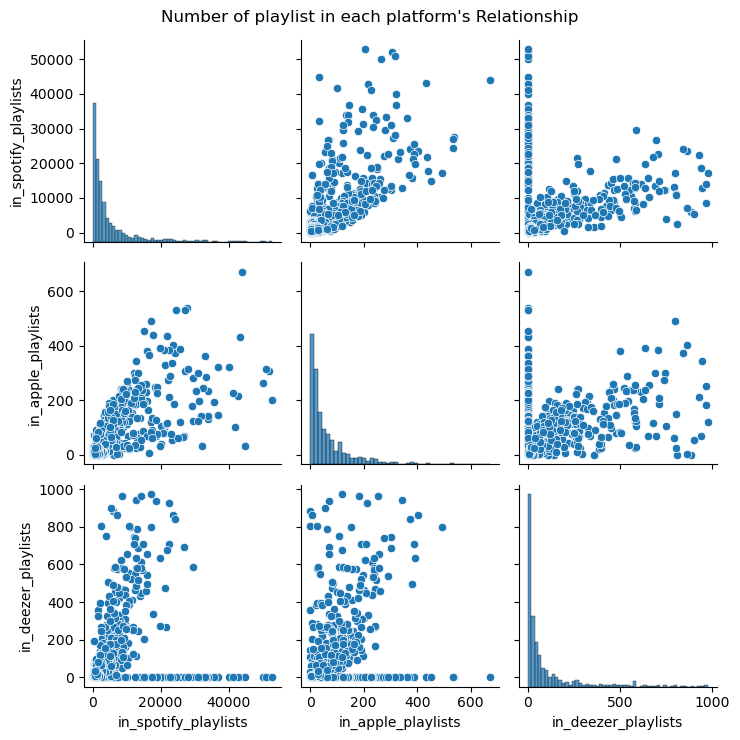

In [18]:
cols = ['in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists']
sns.pairplot(df[cols])
plt.suptitle("Number of playlist in each platform's Relationship")
plt.tight_layout()
plt.show() 

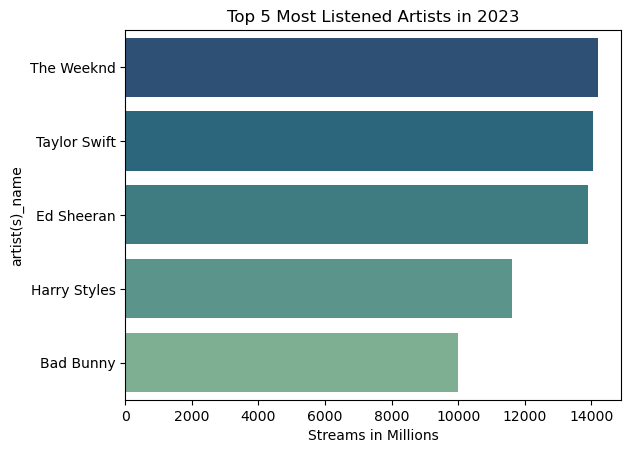

In [19]:
x=df.groupby('artist(s)_name')['streams_million'].sum().reset_index().sort_values('streams_million',ascending=False).head()
sns.barplot(data=x, x='streams_million',y='artist(s)_name',palette='crest_r')
plt.xlabel('Streams in Millions')
plt.title('Top 5 Most Listened Artists in 2023')
plt.show()

## From those top artists, which track year was the most listened from each of them?

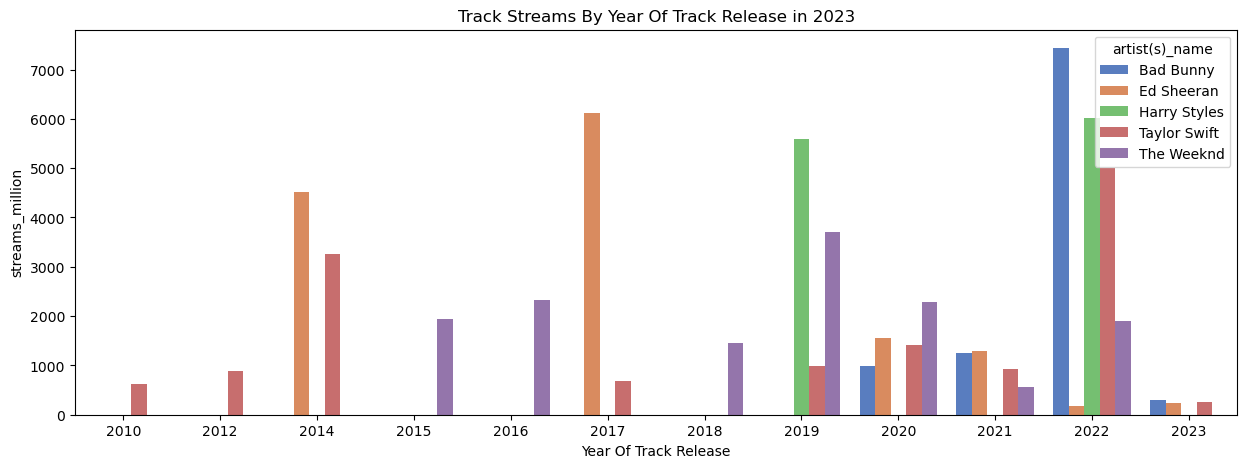

In [20]:
top=df.groupby('artist(s)_name')['streams_million'].sum().reset_index().sort_values('streams_million',ascending=False).head()['artist(s)_name']

x=df[df['artist(s)_name'].isin(top)]
x=x.groupby(['artist(s)_name','released_year'])['streams_million'].sum().reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=x,x='released_year',y='streams_million',hue='artist(s)_name',palette='muted')
plt.xlabel('Year Of Track Release')
plt.title('Track Streams By Year Of Track Release in 2023')
plt.show()

## Who Are The Most Listened Tracks in The Past 5 Years?

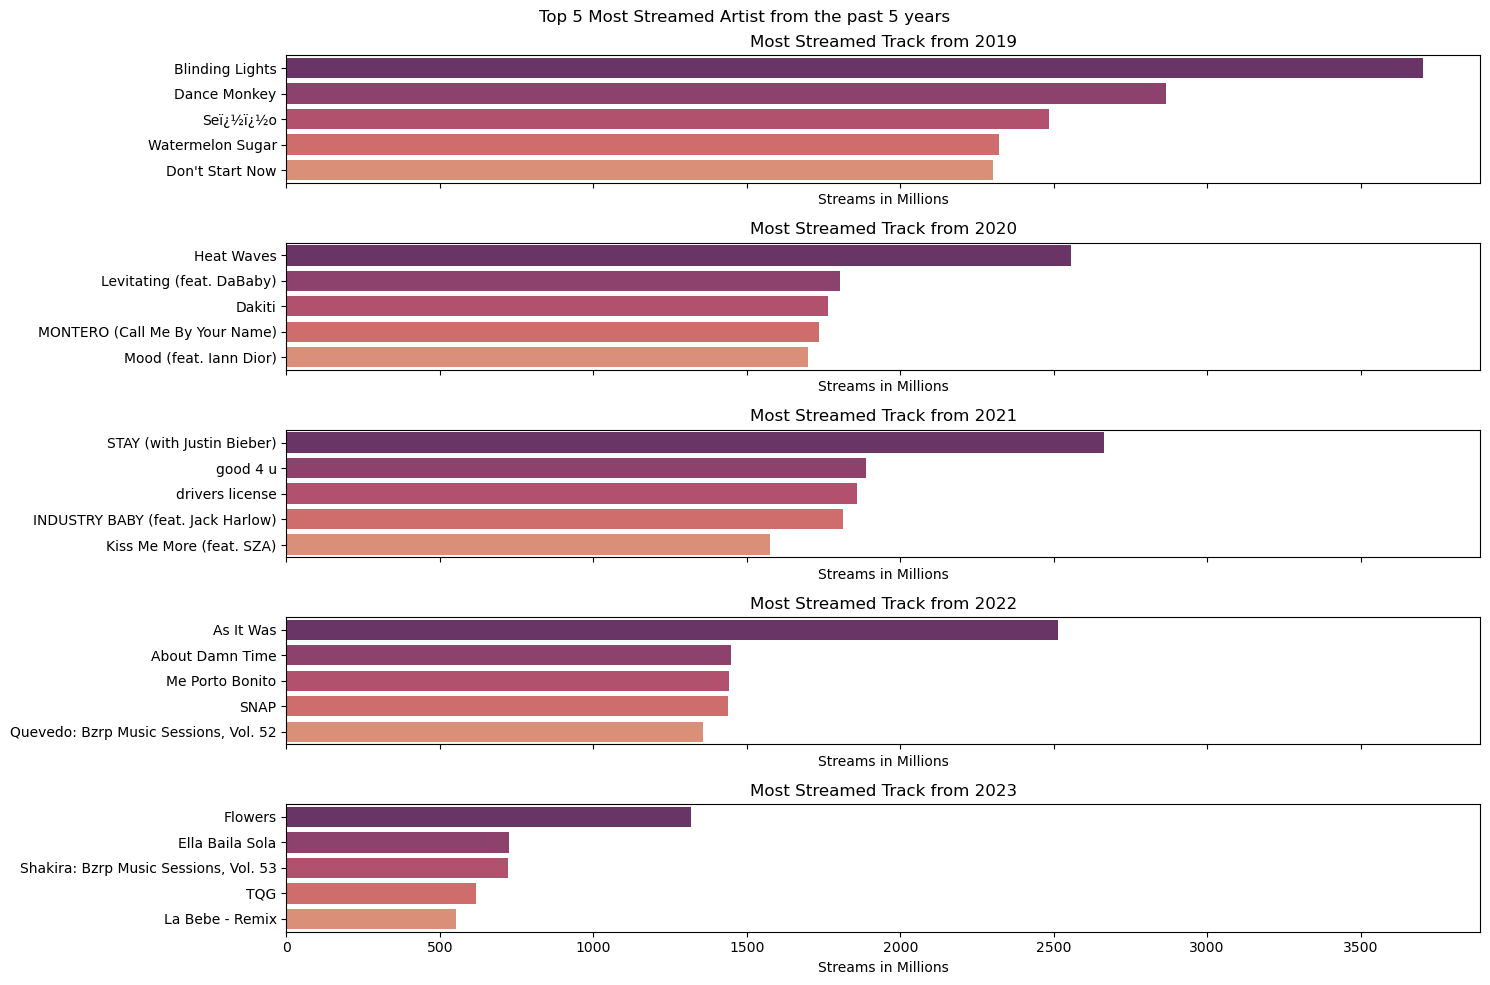

In [21]:
x=df.groupby(['released_year','track_name'])['streams_million'].sum().reset_index().sort_values(['released_year','streams_million'],ascending=[True,False])
x=x[x.released_year>2018]
fig, ax = plt.subplots(5,1,sharex=True,figsize=(15,10))
count1=0
for year in x.released_year.unique():
    y=x[x.released_year==year].head()
    sns.barplot(ax=ax[count1], data=y, x='streams_million', y='track_name',palette='flare_r')
    ax[count1].set_ylabel('')
    ax[count1].set_xlabel('Streams in Millions')
    ax[count1].title.set_text('Most Streamed Track from '+str(year))
    count1=count1+1
fig.suptitle('Top 5 Most Streamed Artist from the past 5 years')
fig.tight_layout() 
plt.show()

## Which tracks have more streams? Single or multiple artist tracks?

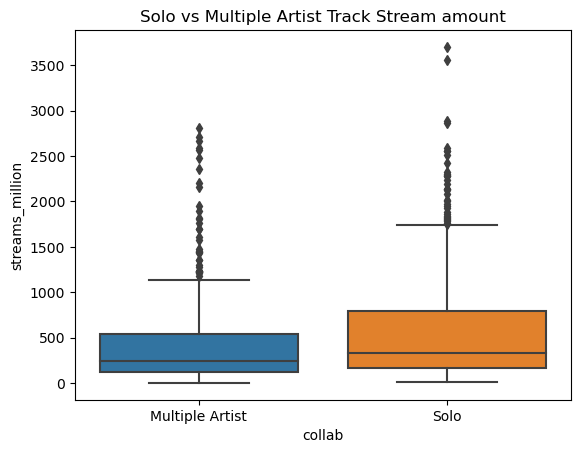

In [22]:
sns.boxplot(data=df,x='collab',y='streams_million')
plt.title("Solo vs Multiple Artist Track Stream amount")
plt.show()

## What Tracks Are Most Listened by Each Number Artists?

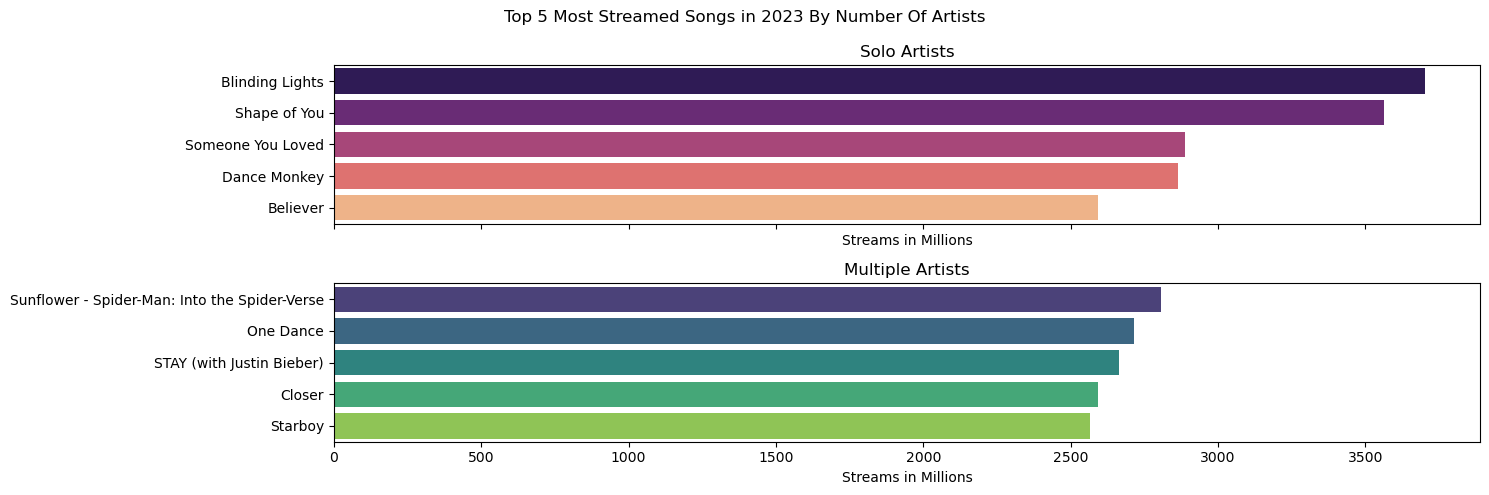

In [23]:
x=df.sort_values(['collab','streams_million'],ascending=[True,False])

fig, ax = plt.subplots(2,1, figsize=(15,5),sharex=True)
sns.barplot(ax=ax[0],data=x[x.collab=='Solo'].head(),y='track_name',x='streams_million',palette='magma')
ax[0].title.set_text('Solo Artists')
ax[0].set_ylabel('')
ax[0].set_xlabel('Streams in Millions')

sns.barplot(ax=ax[1],data=x[x.collab!='Solo'].head(),y='track_name',x='streams_million',palette='viridis')
ax[1].title.set_text('Multiple Artists')
ax[1].set_ylabel('')
ax[1].set_xlabel('Streams in Millions')

plt.suptitle('Top 5 Most Streamed Songs in 2023 By Number Of Artists')
fig.tight_layout() 
plt.show()

## Which key and mode is most used?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


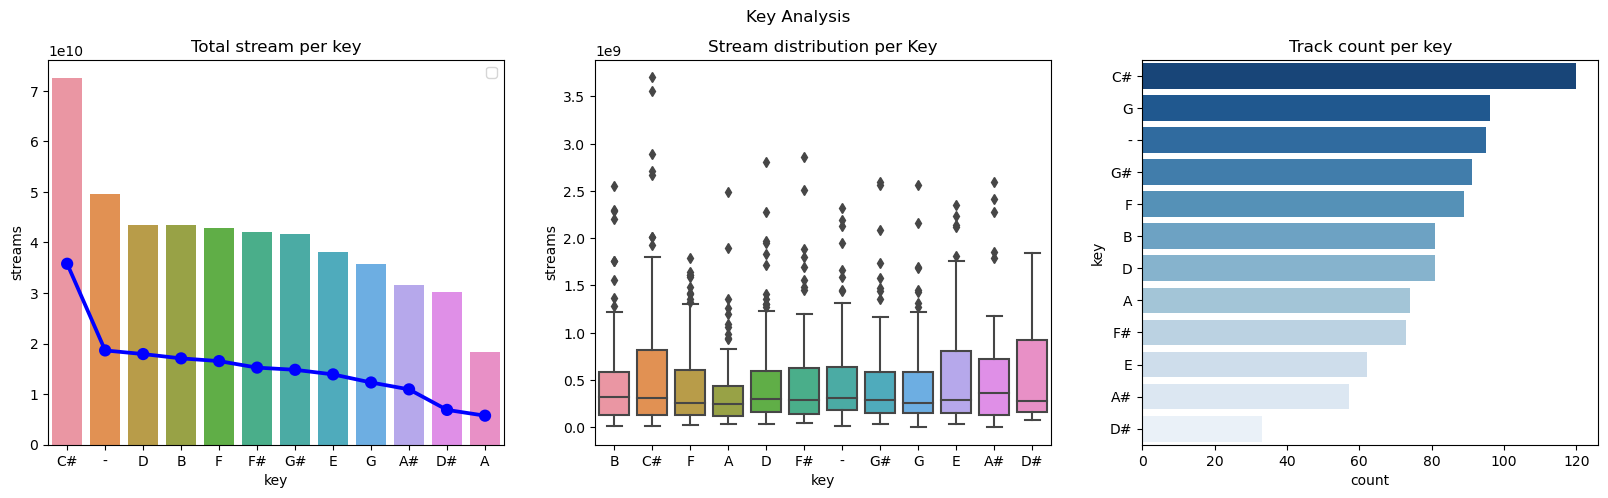

In [24]:
fig,ax=plt.subplots(1,3,figsize=(20,5))

x=df.groupby('key')['streams'].sum().reset_index().sort_values('streams',ascending=False)
sns.barplot(data=x, y='streams', x='key',ax=ax[0])

y=df.sort_values('streams',ascending=False).head(n=100).groupby('key')['streams'].sum().reset_index().sort_values('streams',ascending=False)
sns.pointplot(data=y, y='streams', x='key',color='blue',label='Top 100 Tracks',ax=ax[0])
ax[0].legend()
ax[0].title.set_text('Total stream per key')


sns.boxplot(data=df, x='key', y='streams',ax=ax[1])
ax[1].title.set_text("Stream distribution per Key")

sns.countplot(data=df,y='key',order=df['key'].value_counts().index, palette='Blues_r',ax=ax[2])
ax[2].title.set_text("Track count per key")

plt.suptitle('Key Analysis')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


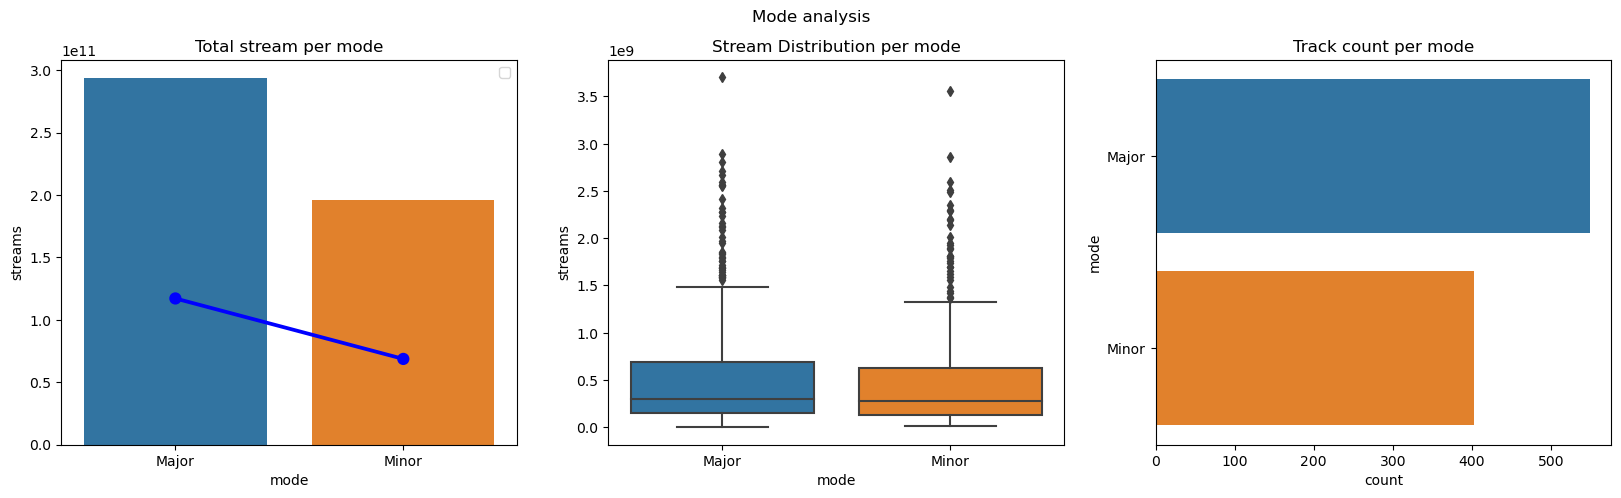

In [25]:
fig,ax=plt.subplots(1,3,figsize=(20,5))

x=df.groupby('mode')['streams'].sum().reset_index().sort_values('streams',ascending=False)
sns.barplot(data=x, y='streams', x='mode',ax=ax[0])

y=df.sort_values('streams',ascending=False).head(n=100).groupby('mode')['streams'].sum().reset_index().sort_values('streams',ascending=False)
sns.pointplot(data=y, y='streams', x='mode',color='blue',label='Top 100 Tracks',ax=ax[0])
ax[0].legend()
ax[0].title.set_text('Total stream per mode')

sns.boxplot(data=df, x='mode', y='streams',ax=ax[1])
ax[1].title.set_text("Stream Distribution per mode")

sns.countplot(data=df,y='mode',order=df['mode'].value_counts().index,ax=ax[2])
ax[2].title.set_text("Track count per mode")

plt.suptitle('Mode analysis')
plt.show()